In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'KOTAKBANK.NS'  
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-07-02,2.402500,2.475000,2.400000,2.402500,2.223230,110800
2001-07-03,2.475000,2.475000,2.375000,2.400000,2.220916,77520
2001-07-04,2.425000,2.450000,2.387500,2.420000,2.239424,49360
2001-07-05,2.450000,2.472500,2.400000,2.415000,2.234797,62700
2001-07-06,2.425000,2.425000,2.350000,2.400000,2.220916,117800
...,...,...,...,...,...,...
2024-06-19,1729.000000,1763.050049,1715.000000,1746.699951,1746.699951,9959798
2024-06-20,1765.000000,1789.849976,1760.300049,1766.250000,1766.250000,9243104
2024-06-21,1770.000000,1789.000000,1745.300049,1775.650024,1775.650024,19031689


In [37]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(4, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(3, return_sequences=False))
model.add(Dense(2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=200)

[array([0.00046955, 0.00046841, 0.00047747, 0.0004752 , 0.00046841,
       0.00045936, 0.00044126, 0.00042316, 0.00042316, 0.00040053,
       0.00038921, 0.00040392, 0.00039826, 0.00039034, 0.00036885,
       0.0003779 , 0.00028625, 0.00032472, 0.00033264, 0.00033943])]
[0.0003201958723308365]

[array([0.00046955, 0.00046841, 0.00047747, 0.0004752 , 0.00046841,
       0.00045936, 0.00044126, 0.00042316, 0.00042316, 0.00040053,
       0.00038921, 0.00040392, 0.00039826, 0.00039034, 0.00036885,
       0.0003779 , 0.00028625, 0.00032472, 0.00033264, 0.00033943]), array([0.00046841, 0.00047747, 0.0004752 , 0.00046841, 0.00045936,
       0.00044126, 0.00042316, 0.00042316, 0.00040053, 0.00038921,
       0.00040392, 0.00039826, 0.00039034, 0.00036885, 0.0003779 ,
       0.00028625, 0.00032472, 0.00033264, 0.00033943, 0.0003202 ])]
[0.0003201958723308365, 0.0003326416097779735]

Epoch 1/200
542/542 [==============================] - 20s 22ms/step - loss: 0.0115
Epoch 2/200
542/542 [==========

In [38]:
predictions = model.predict(x_train)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_train,predictions)
r2

170/170 [==============================] - 8s 11ms/step


0.9994184032323253

In [40]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

9/9 [==============================] - 0s 9ms/step


0.9113981842742122

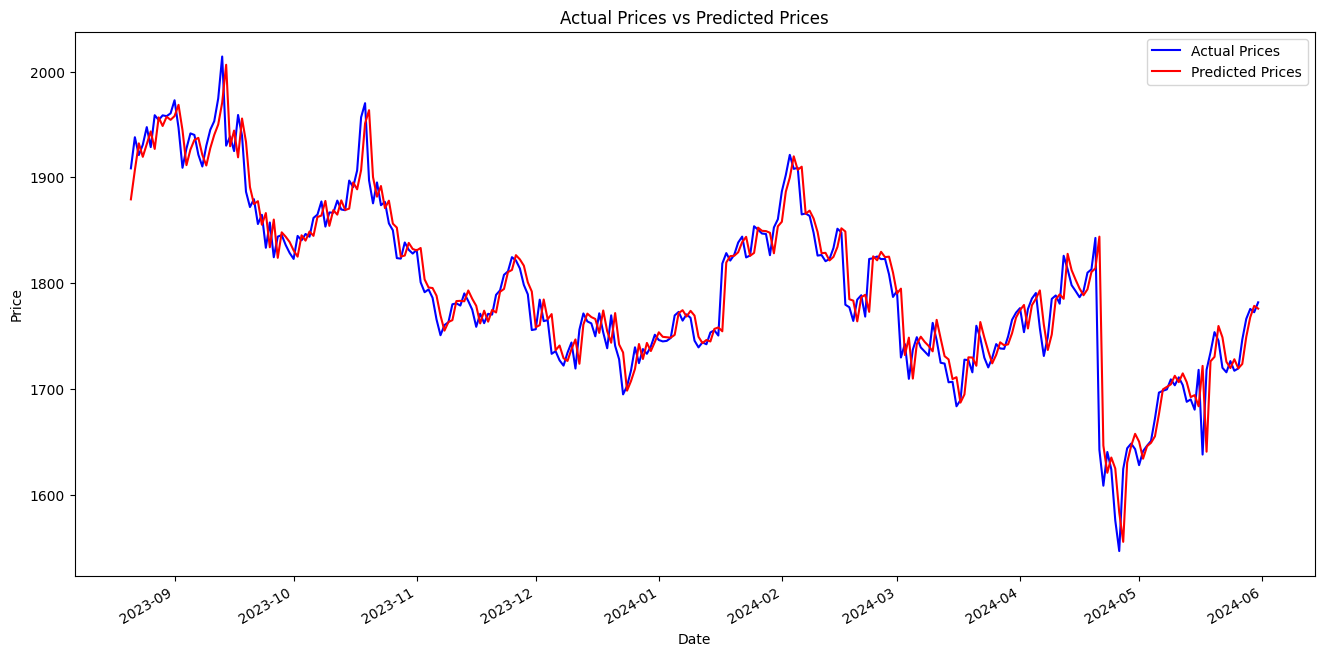

In [41]:
import matplotlib.pyplot as plt
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [42]:
import joblib


model_file_path = '6.joblib'
scaler_file_path = 'scaler6.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to 6.joblib
Scaler saved to scaler6.joblib
